In [134]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from torch_example import predicted

In [112]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [113]:
data.shape

(1338, 7)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [115]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [116]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

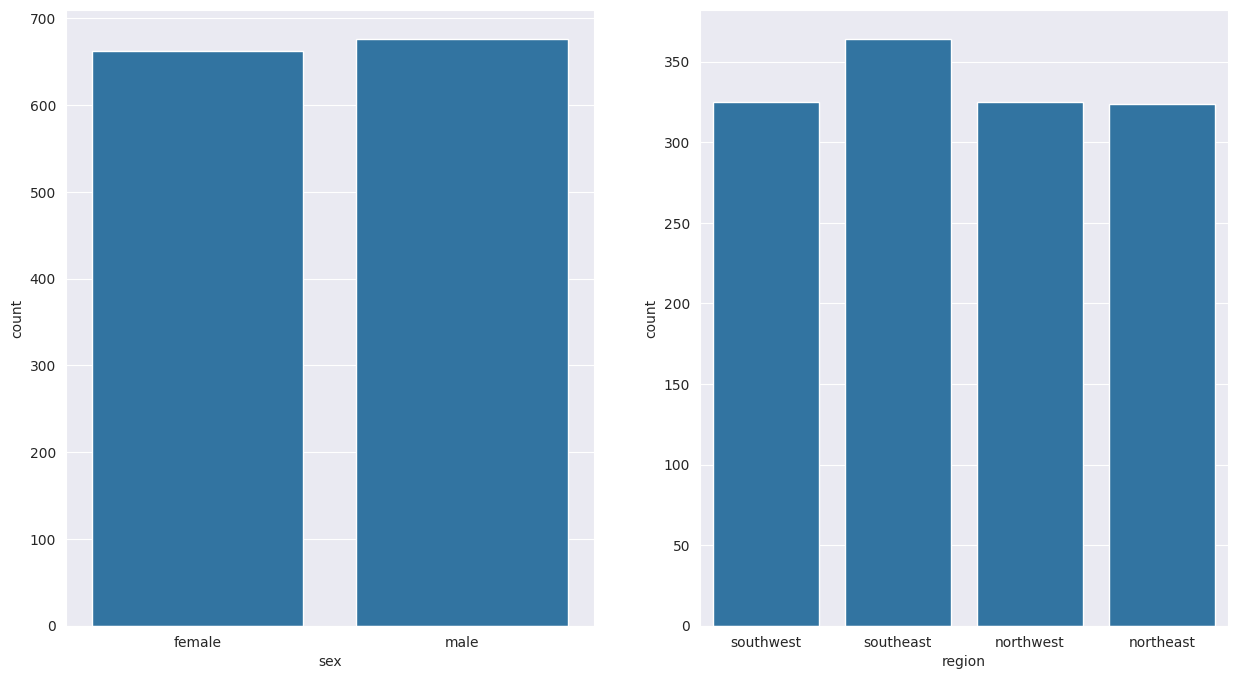

In [117]:
import seaborn as sns

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
sns.countplot(x='sex', data=data)

plt.subplot(1, 2, 2)
sns.countplot(x='region', data=data)


plt.show()

In [118]:
# tranform smoke column to binary
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

In [153]:
region_cat = data[['region']]
# region_cat
# region_cat.astype('category').cat.codes

In [154]:

onehot_encoder = OneHotEncoder()
region_cat_encoded = onehot_encoder.fit_transform(region_cat)
region_cat_encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1338 stored elements and shape (1338, 4)>

In [156]:
df_dummies = pd.get_dummies(data, columns=['region'])

df_dummies

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,False,True,False,False
1334,18,0,31.920,0,0,2205.98080,True,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,False,True


In [136]:
onehot_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [144]:
from sklearn.compose import ColumnTransformer

# num_attribs = list(housing_num)
cat_attribs = ["region"]

full_pipeline = ColumnTransformer([
    # ("num", num_pipeline, num_attribs), #tratando as variáveis numéricas (chamando a pipeline de cima)
    ("cat", OneHotEncoder(), cat_attribs), # tratando as variáveis categóricas
])

data_transformed = full_pipeline.fit_transform(data)

In [150]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [152]:
print(data_transformed)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1338 stored elements and shape (1338, 4)>
  Coords	Values
  (0, 3)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 2)	1.0
  (12, 3)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 3)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 0)	1.0
  (21, 3)	1.0
  (22, 2)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (1313, 3)	1.0
  (1314, 1)	1.0
  (1315, 0)	1.0
  (1316, 3)	1.0
  (1317, 2)	1.0
  (1318, 0)	1.0
  (1319, 1)	1.0
  (1320, 1)	1.0
  (1321, 0)	1.0
  (1322, 2)	1.0
  (1323, 2)	1.0
  (1324, 1)	1.0
  (1325, 0)	1.0
  (1326, 0)	1.0
  (1327, 2)	1.0
  (1328, 0)	1.0
  (1329, 3)	1.0
  (1330, 2)	1.0
  (1331, 3)	1.0
  (1332, 3)	1.0
  (1333, 1)	1.0
  (1334, 0)	1.0
  (1335, 2)	1.0
  (1336, 3)	1.0
  (1337, 1)	1.0


In [148]:
column_names=['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
new_df = pd.DataFrame(data_transformed, columns=column_names)

ValueError: Shape of passed values is (1338, 1), indices imply (1338, 7)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

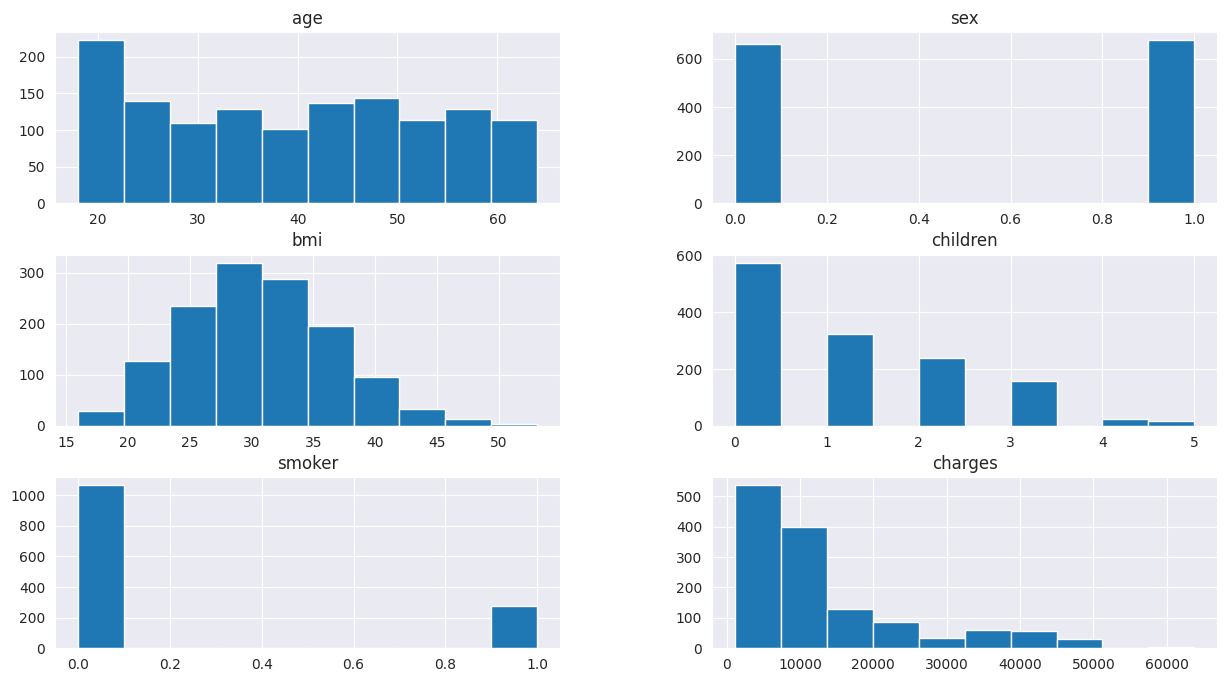

In [140]:
data.hist(figsize=(15, 8))

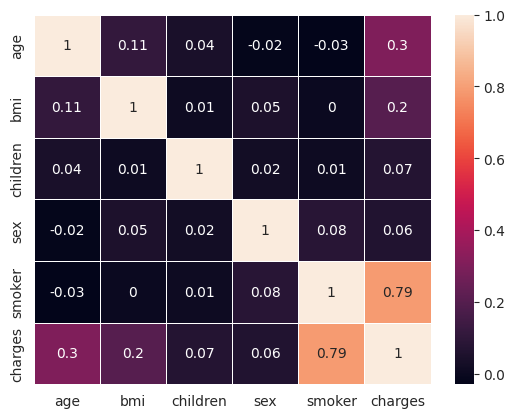

In [123]:
numeric_columns = ['age', 'bmi', 'children', 'sex', 'smoker', 'charges']
correlation_matrix = data[numeric_columns].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5)

plt.show()

fumante parece ter bastante peso em relação as taxas dos planos 

## Criar um modelo preditivo e comprovar sua eficacia com metricas estatisticas

In [124]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [125]:
train_df.shape

(1070, 7)

In [126]:
test_df.shape

(268, 7)

In [130]:
test_df.head()

,age,sex,bmi,children,smoker,region,charges
764,45,0,25.175,2,0,northeast,9095.06825
887,36,0,30.020,0,0,northwest,5272.17580
890,64,0,26.885,0,1,northwest,29330.98315
1293,46,1,25.745,3,0,northwest,9301.89355
259,19,1,31.920,0,1,northwest,33750.29180


In [128]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(train_df[['age', 'sex', 'bmi', 'children', 'smoker']], train_df['charges'])

LinearRegression()

In [129]:
linear_regression.score(test_df[['age', 'bmi', 'children', 'smoker']], test_df['charges'])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- sex


In [88]:

linear_regression.predict(test_df[['age', 'bmi', 'children', 'smoker']])

array([ 8550.90921341,  6969.71599759, 36794.13661808,  9421.86824203,
       26875.01095777, 11101.26514111,   141.44896605, 16750.22436643,
         743.78364016, 11157.63586446, 28521.42342227,  9296.15962897,
        5456.5831315 , 38513.59317763, 40362.63211366, 37226.61219261,
       15312.47750251, 36042.83494384,  9322.40796481, 31395.64230108,
        4273.49461256, 10468.62243337,  2723.96491222,  6575.5287315 ,
       11228.01912269, 12468.20703945, 14803.23875441,  6062.13408867,
        9531.77127863,  2381.73787018,  9470.9842188 , 12959.38866372,
        4702.13338911,  3410.73606761,  4819.65393639, 12488.16536441,
        2355.2166747 ,  9157.11135848, 33234.15784494, 32746.69484389,
        4270.42403098,  4233.52485656, 14431.41993531, 11388.84943272,
        8929.60714179, 12484.19557109,  5150.40526844,  3550.1037231 ,
       35652.7853174 ,  9280.12457197, 15967.47938558,  2556.74541518,
       12158.95859481,  1066.73450634, 13555.51395976, 12107.63444981,
      

In [89]:
my_test_def = pd.DataFrame({
    'age': [35],
    'bmi': [20],
    'children': [1],
    'smoker': [0]
})

linear_regression.predict(my_test_def)

array([3858.06804704])